### Table of Contents

* [Case study classification project](#casestudy)
* [EDA - exploratory data analysis - get to know the data](#eda)
* [Get the sweet summary stats on each column to understand the distribution better](#summary)
* [Get a  representation of the numbers](#numbersrep)
* [Outliers](#outliers)
* [Box Plots](#boxplots)
* [Outliers](#outliers)
* [Pre-processing](#preprocessing)
* [Split off the dependant variable (label) ](#split)
* [TT split and get model](#ttsplit)
* [Apply model, train model](#applymoded)
* [Evaluate accuracy and test](#evaluate)
* [Visualising accuracy - ROC / AUC](#rocauc)
* [Data imbalanced -  SMOTE (oversample the minority class of the target label)](#smote)


* [sample](#sample)



## Case study classification project  - B<a class="anchor" id="casestudy"></a>

In [23]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [24]:
# conda install -c conda-forge jupyter_contrib_nbextensions

In [25]:
# df = pd.read_csv('creditcardmarketing.csv')

In [26]:
df_original = pd.read_excel(r'data/creditcardmarketing.xlsx')

In [27]:
# save as a csv file to use in the SQL task
import csv
df_original.to_csv(r'new_creditcardmarketing_original.csv', index = False)

In [28]:

# create a copy of the dataaet
df = df_original

###  EDA - exploratory data analysis - get to know the data <a class="anchor" id="eda"></a>

In [29]:
# check information about the dataset
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [30]:
# cheack shape
df.shape

(18000, 17)

In [31]:
# print the sum of null values 
print(df.isnull().sum())

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64


In [32]:
# standize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [33]:
# find the percentage of missing values
pct_missing=24/18000
pct_missing

0.0013333333333333333

We found few missing values (less than 20%). so we are not droping them.<br/>
Since the balances columns are float, we will fill them with the mean

In [34]:
# # fill nulls with the means

# col_miss_values= ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

# mean_average_balance = df['average_balance'].mean()
# df['average_balance'] = df['average_balance'].fillna(mean_average_balance)

# mean_average_balance = df['q1_balance'].mean()
# df['q1_balance'] = df['q1_balance'].fillna(mean_average_balance)

# mean_q2_balance = df['q2_balance'].mean()
# df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)

# mean_q3_balance = df['q3_balance'].mean()
# df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)

# mean_q4_balance = df['q4_balance'].mean()
# df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
                                           


In [35]:
col_miss_values= ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

mean_average_balance = df['average_balance'].mean()
df['average_balance'] = df['average_balance'].fillna(mean_average_balance)
df['average_balance'] = pd.to_numeric(df['average_balance'], errors = 'coerce')

mean_average_balance = df['q1_balance'].mean()
df['q1_balance'] = df['q1_balance'].fillna(mean_average_balance)
df['q1_balance'] = pd.to_numeric(df['q1_balance'], errors = 'coerce')

mean_q2_balance = df['q2_balance'].mean()
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)
df['q2_balance'] = pd.to_numeric(df['q2_balance'], errors = 'coerce')

mean_q3_balance = df['q3_balance'].mean()
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)
df['q3_balance'] = pd.to_numeric(df['q3_balance'], errors = 'coerce')

mean_q4_balance = df['q4_balance'].mean()
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
df['q4_balance'] = pd.to_numeric(df['q4_balance'], errors = 'coerce')

df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       18000 non-null  float64
 13  q1_balance            18000 non-null  float64
 14  q2_balance            18000 non-null  float64
 15  q3_balance         

In [37]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [38]:
df.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### Get the sweet summary stats on each column to understand the distribution better <a class="anchor" id="summary"></a>

In [39]:
#statistical distribution
df.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### Get a  representation of the numbers  <a class="anchor" id="numbersrep"></a>

In [40]:
# using pandas
# hist = df.hist(figsize=(15,10),layout=(3,4), grid=False)

In [41]:
# # check relationships with seaborn
# sns.pairplot(df)
# plt.show()

Only the household_size has a normal distribution.

In [42]:
# # check for multicollinearity 
# corr_matrix=df.corr(method='pearson')  # default
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

The graph proves the absence of multicollinearity. 

"The linear model makes the following assumptions
- Require a linear relationship between the dependent and independent variables.
- The error terms (residuals) need to be normally distributed. 
- If not weights can be introduced to penalize some observations in the error metric.
Independent variables are normally distributed.
If not (apply transformation Box-Cox)
- Absence of multicollinearity.
- Independent observations (not repeated)"

In [43]:
# check for more claning
# df.head(20)
# df.tail(20)
# drop customer_number
df=df.drop(['customer_number', 'mailer_type', 'average_balance', 'q1_balance'], axis=1)
df.head(10)


,offer_accepted,reward,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q2_balance,q3_balance,q4_balance
0,No,Air Miles,High,1,No,High,2,1,4,No,877.0,1095.0,1002.0
1,No,Air Miles,Medium,1,No,Medium,2,2,5,Yes,106.0,78.0,366.0
2,No,Air Miles,High,2,No,Medium,2,1,2,Yes,352.0,145.0,242.0
3,No,Air Miles,Medium,2,No,High,1,1,4,No,1760.0,1119.0,419.0
4,No,Air Miles,Medium,1,No,Medium,2,1,6,Yes,1357.0,982.0,365.0
5,No,Air Miles,Medium,1,No,High,3,1,4,No,1365.0,750.0,497.0
6,No,Air Miles,Medium,1,No,Medium,2,1,3,No,188.0,347.0,132.0
7,No,Cash Back,Low,1,No,Medium,4,1,4,Yes,391.0,285.0,306.0
8,No,Air Miles,Medium,1,No,Low,2,1,4,Yes,891.0,882.0,1353.0
9,No,Air Miles,High,2,No,Low,3,2,4,Yes,1454.0,514.0,115.0


It seems that there is no need to make more cleaning. Neither for Bucketing features.

In [44]:
df.columns

Index(['offer_accepted', 'reward', 'income_level', 'bank_accounts_open',
       'overdraft_protection', 'credit_rating', 'credit_cards_held',
       'homes_owned', 'household_size', 'own_your_home', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        18000 non-null  object 
 1   reward                18000 non-null  object 
 2   income_level          18000 non-null  object 
 3   bank_accounts_open    18000 non-null  int64  
 4   overdraft_protection  18000 non-null  object 
 5   credit_rating         18000 non-null  object 
 6   credit_cards_held     18000 non-null  int64  
 7   homes_owned           18000 non-null  int64  
 8   household_size        18000 non-null  int64  
 9   own_your_home         18000 non-null  object 
 10  q2_balance            18000 non-null  float64
 11  q3_balance            18000 non-null  float64
 12  q4_balance            18000 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.8+ MB


In [46]:
df.describe()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,1.255778,1.903500,1.203444,3.499056,999.392190,1042.033600,810.185803
std,0.472501,0.797009,0.427341,1.114182,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,664.000000,633.000000,363.750000
50%,1.000000,2.000000,1.000000,3.000000,1032.000000,946.000000,704.000000
75%,1.000000,2.000000,1.000000,4.000000,1342.000000,1462.000000,1211.000000
max,3.000000,4.000000,3.000000,9.000000,3421.000000,3823.000000,4215.000000


### Outliers <a class="anchor" id="outliers"></a>

### Box Plots <a class="anchor" id="boxplots"></a>
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [49]:
# find quartiles
cols_outliers = ['q2_balance', 'q3_balance', 'q4_balance']

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Q1 of the column ', col,':', Q1)
    print('Q3 of the column ', col,':', Q3)
    print('IRQ of the column ', col,':', IQR)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    print('lower_whisker: ', Lower_Whisker, ',' , 'upper whisker: ', Upper_Whisker)
    #  Outlier Treatment 
    df = df[df[col]< Upper_Whisker]
    df = df[df[col]> Lower_Whisker]
df.shape


Q1 of the column  q2_balance : 663.25
Q3 of the column  q2_balance : 1341.0
IRQ of the column  q2_balance : 677.75
lower_whisker:  -353.375 , upper whisker:  2357.625
Q1 of the column  q3_balance : 633.0
Q3 of the column  q3_balance : 1461.0
IRQ of the column  q3_balance : 828.0
lower_whisker:  -609.0 , upper whisker:  2703.0
Q1 of the column  q4_balance : 363.0
Q3 of the column  q4_balance : 1210.0
IRQ of the column  q4_balance : 847.0
lower_whisker:  -907.5 , upper whisker:  2480.5


(17990, 13)

In [50]:
df.head()

,offer_accepted,reward,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q2_balance,q3_balance,q4_balance
0,No,Air Miles,High,1,No,High,2,1,4,No,877.0,1095.0,1002.0
1,No,Air Miles,Medium,1,No,Medium,2,2,5,Yes,106.0,78.0,366.0
2,No,Air Miles,High,2,No,Medium,2,1,2,Yes,352.0,145.0,242.0
3,No,Air Miles,Medium,2,No,High,1,1,4,No,1760.0,1119.0,419.0
4,No,Air Miles,Medium,1,No,Medium,2,1,6,Yes,1357.0,982.0,365.0


<AxesSubplot:>

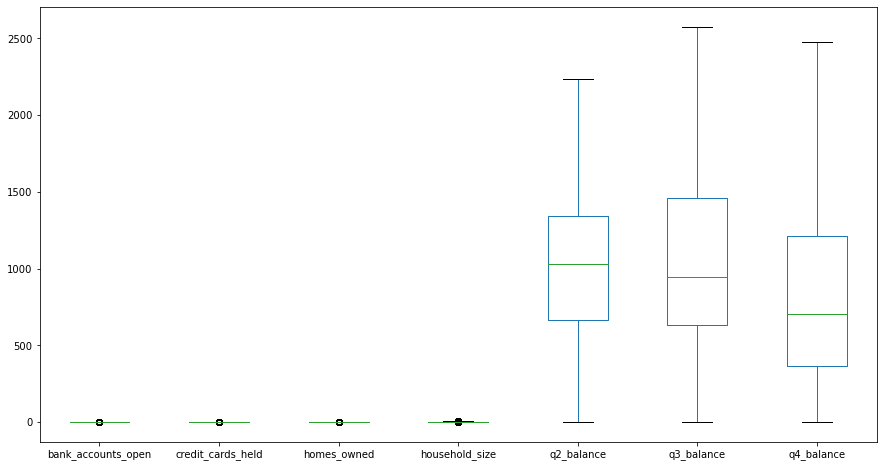

In [51]:
# check outliers
df.boxplot(grid=False, figsize= (15,8))

In [52]:
# label / encode any categorical columns 

cat = df.select_dtypes(include = np.object)
cat

,offer_accepted,reward,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,High,No,High,No
1,No,Air Miles,Medium,No,Medium,Yes
2,No,Air Miles,High,No,Medium,Yes
3,No,Air Miles,Medium,No,High,No
4,No,Air Miles,Medium,No,Medium,Yes
...,...,...,...,...,...,...
17995,No,Cash Back,High,No,Low,Yes
17996,No,Cash Back,High,No,Low,Yes
17997,No,Cash Back,High,No,Low,No
17998,No,Cash Back,Medium,No,Medium,Yes


In [53]:
# # checking all the categorical columns
# cols_cat = ['offer_accepted', 'reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']
# for col in cols_cat:
#     print("Frequency analysis of column: ",col)
#     my_data = df[col].value_counts().reset_index()
#     my_data.drop(my_data.index[0])
#     ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
#     plt.figure()


In [54]:
df.describe()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q2_balance,q3_balance,q4_balance
count,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000
mean,1.255809,1.903558,1.203446,3.499444,998.663002,1041.206437,809.064339
std,0.472418,0.797031,0.427356,1.114030,455.640240,551.868613,556.540495
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,663.250000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1031.000000,946.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1341.000000,1461.000000,1210.000000
max,3.000000,4.000000,3.000000,9.000000,2234.000000,2576.000000,2475.000000


In [56]:
# a =df['average_balance'].value_counts().reset_index()
# a.drop(a.index[0])

In [ ]:
# locate the target column in the last position
cols = list(df.columns)
cols = cols[1:]+[cols[0]]
df = df[cols]


In [ ]:
df.head()

In [ ]:
df.dtypes

In [57]:
# convert balances to float

df['q2_balance'] = pd.to_numeric(df.q2_balance, errors='coerce')
df['q3_balance'] = pd.to_numeric(df.q3_balance, errors='coerce')
df['q4_balance'] = pd.to_numeric(df.q4_balance, errors='coerce')


In [58]:
df.dtypes

offer_accepted           object
reward                   object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

### Density Plots

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

In [59]:
# create numericala
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q2_balance,q3_balance,q4_balance
0,1,2,1,4,877.0,1095.0,1002.0
1,1,2,2,5,106.0,78.0,366.0
2,2,2,1,2,352.0,145.0,242.0
3,2,1,1,4,1760.0,1119.0,419.0
4,1,2,1,6,1357.0,982.0,365.0


In [60]:
# for col in df_num.columns:
#     ax = sns.kdeplot(data= df_num, x= col, shade= True)
#     plt.figure()

In [61]:
# for col in df_num.columns:
#     plt.figure(figsize=(10,6)) 
#     sns.kdeplot(df[col][df.offer_accepted  == 'Yes'], shade=True)
#     sns.kdeplot(df[col][df.offer_accepted  == 'No'], shade=True)
#     plt.legend(['offer_accepted ', 'offer_rejected'])
#     plt.title(col)
#     plt.show()


<AxesSubplot:>

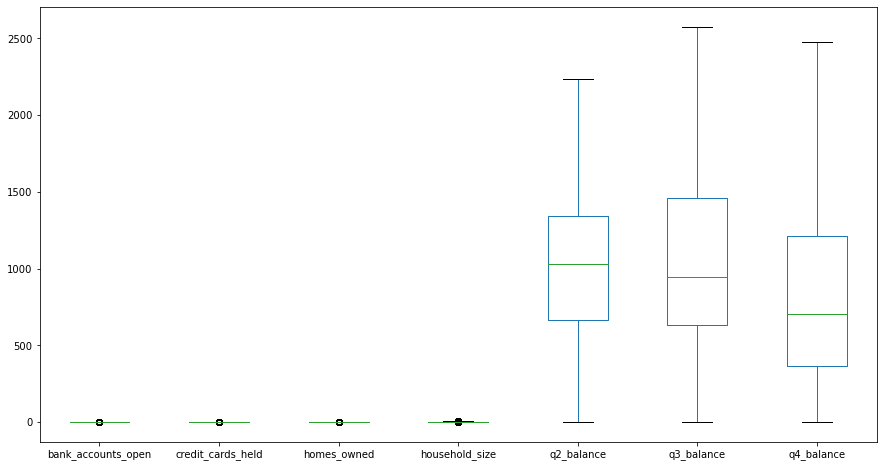

In [62]:
# check outliers
df.boxplot(grid=False, figsize= (15,8))

Note: the quartiles didn't removed all the outliers for average_balance. It could be improved.

In [63]:
# df.hist(figsize=(15,10),layout=(3,4), grid=False)

In [64]:
df.shape

(17990, 13)

### Pre-processing <a class="anchor" id="preprocessing"></a>


In [65]:
cat.head()



,offer_accepted,reward,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,High,No,High,No
1,No,Air Miles,Medium,No,Medium,Yes
2,No,Air Miles,High,No,Medium,Yes
3,No,Air Miles,Medium,No,High,No
4,No,Air Miles,Medium,No,Medium,Yes


In [66]:
cat.columns

Index(['offer_accepted', 'reward', 'income_level', 'overdraft_protection',
       'credit_rating', 'own_your_home'],
      dtype='object')

In [67]:
# reset index
df = df.reset_index(drop = True)

In [68]:
df.head()

,offer_accepted,reward,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q2_balance,q3_balance,q4_balance
0,No,Air Miles,High,1,No,High,2,1,4,No,877.0,1095.0,1002.0
1,No,Air Miles,Medium,1,No,Medium,2,2,5,Yes,106.0,78.0,366.0
2,No,Air Miles,High,2,No,Medium,2,1,2,Yes,352.0,145.0,242.0
3,No,Air Miles,Medium,2,No,High,1,1,4,No,1760.0,1119.0,419.0
4,No,Air Miles,Medium,1,No,Medium,2,1,6,Yes,1357.0,982.0,365.0


In [69]:
# categorical = pd.get_dummies(cat, columns =['reward', 'mailer_type', 'income_level',
#        'overdraft_protection', 'credit_rating', 'own_your_home',
#        'average_balance', 'offer_accepted'],drop_first=True)

cat = df.select_dtypes(exclude = ['float64'])
cat.info()

# categorical.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990 entries, 0 to 17989
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   offer_accepted        17990 non-null  object
 1   reward                17990 non-null  object
 2   income_level          17990 non-null  object
 3   bank_accounts_open    17990 non-null  int64 
 4   overdraft_protection  17990 non-null  object
 5   credit_rating         17990 non-null  object
 6   credit_cards_held     17990 non-null  int64 
 7   homes_owned           17990 non-null  int64 
 8   household_size        17990 non-null  int64 
 9   own_your_home         17990 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.4+ MB


In [70]:
# create a list of the column names
cat_col=cat.columns.to_list()
cat_col

['offer_accepted',
 'reward',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home']

In [72]:
categorical = pd.get_dummies(cat, columns =['reward',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'offer_accepted'],drop_first=True)

In [74]:
categorical.head()

,reward_Cash Back,reward_Points,income_level_Low,income_level_Medium,bank_accounts_open_2,bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,credit_cards_held_2,...,homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes,offer_accepted_Yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [75]:
categorical['offer_accepted_Yes'].value_counts()

0    16967
1     1023
Name: offer_accepted_Yes, dtype: int64

In [76]:
# percentage
pct_offer_accepted = 1023/18000
pct_offer_accepted

0.05683333333333333

In [77]:
# numerical scaling 

from sklearn.preprocessing import Normalizer

In [78]:
# df_num are the numerical

X = df_num.drop(['bank_accounts_open', 'credit_cards_held', 'homes_owned', "household_size"], axis=1)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

In [79]:
X_normalised


,0,1,2
0,0.508702,0.635153,0.581208
1,0.272534,0.200544,0.941014
2,0.780311,0.321435,0.536464
3,0.827347,0.526024,0.196965
4,0.791553,0.572812,0.212909
...,...,...,...
17985,0.158740,0.173393,0.971976
17986,0.655076,0.657167,0.372836
17987,0.374739,0.571635,0.729934
17988,0.472796,0.416041,0.776771


### Split off the dependant variable (label) <a class="anchor" id="split"></a>

In [80]:
#sort out the categoricals 
y= categorical['offer_accepted_Yes']
categorical=categorical.drop(['offer_accepted_Yes'], axis=1)
categorical

,reward_Cash Back,reward_Points,income_level_Low,income_level_Medium,bank_accounts_open_2,bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,credit_cards_held_2,...,homes_owned_2,homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17985,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
17986,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
17987,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
17988,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [81]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17985    0
17986    0
17987    0
17988    0
17989    0
Name: offer_accepted_Yes, Length: 17990, dtype: uint8

In [82]:
categorical

,reward_Cash Back,reward_Points,income_level_Low,income_level_Medium,bank_accounts_open_2,bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,credit_cards_held_2,...,homes_owned_2,homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17985,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
17986,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
17987,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
17988,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [83]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X_normalised, categorical),axis=1)



### TT split, get model <a class="anchor" id="ttsplit"></a>

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

### Apply model and train model <a class="anchor" id="applymodel"></a>

In [86]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

### Evaluate accuracy and test <a class="anchor" id="evaluate"></a>

In [87]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [88]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [89]:
accuracy_score(y_test, predictions)

0.9434408004446915

In [90]:
# next steps would be to visualise the accuracy of the predictions in some ways 

# can i improve my model ?? 

### Visualising accuracy - ROC / AUC  <a class="anchor" id="rocauc"></a>

In [91]:
import sklearn.metrics as metrics 
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7248244106397


In [92]:
#definitions 
# tpr = true positive rate 
# fpr = false positive rate

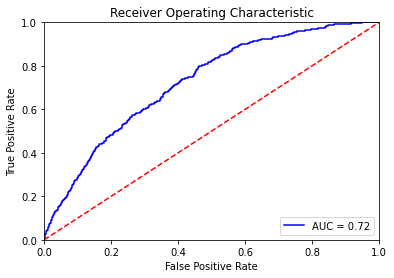

In [93]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

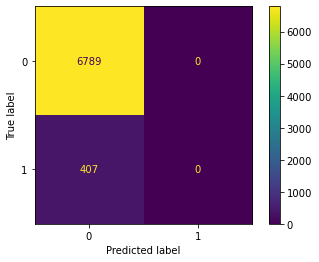

In [94]:
# confusion matrix 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()


### Data imbalanced -  SMOTE (oversample the minority class of the target label) <a class="anchor" id="smote"></a>

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
smote = SMOTE()


In [97]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    16967
1    16967
Name: offer_accepted_Yes, dtype: int64

In [98]:
#re do train test split It2

X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [99]:
# apply model It2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [100]:
#accuracy assessment It2
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.6934580816266391

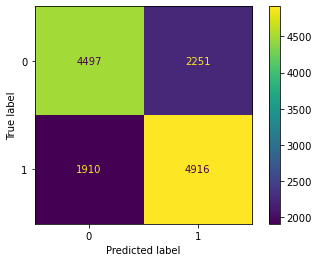

In [101]:
#Conf matrix It2 
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

#### conclusion on imbalance:

- The SMOTE technique solved the imbalanced but the accuracy got too low (71%), but the TOMEK doesn't.
    

### References
- lectures
- women who code: munibootcamp of data science
- https://machinelearningmastery.com/confusion-matrix-machine-learning/
- https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02
    